## Import DataFrame

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
# Dataset from Kaggle, includes international
# URL = 

nba_player_df = pd.read_csv('../Datasets/raw_players_info.csv')
nba_player_df

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...,...
3917,3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


## Check for NaN or Null values

In [3]:
# check for nan 'birthstate'
number_nan_birthState = nba_player_df[['Player', 'birth_state']].isnull().values.sum()
print(f'Number of Null Values: {number_nan_birthState}')

Number of Null Values: 484


In [4]:
# drop null values
nba_player_df = nba_player_df[['Player', 'height', 'birth_state']].dropna(axis=0, how='any')

# df of player and birth_state with null values removed
nba_player_df

# check again for null values
number_nan_birthState = nba_player_df.isnull().values.sum()
print(f'Number of Null Values: {number_nan_birthState}')

Number of Null Values: 0


In [5]:
# Export to csv file
nba_player_df.to_csv("../Datasets/cleaned_NBAplayer_info.csv")

## Bar Chart

In [6]:
# CREATE BAR CHART 
state_list = nba_player_df['birth_state'].tolist()

state_list

player_list = nba_player_df.groupby(['birth_state']).count()

player_list = player_list['Player'].tolist()
player_list

# create x-axis len for plotting
x_axis = np.arange(len(player_list))

ValueError: The number of FixedLocator locations (128), usually from a call to set_ticks, does not match the number of ticklabels (3439).

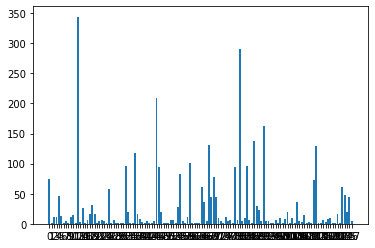

In [7]:
# BAR CHART

plt.bar(x_axis, player_list)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, state_list, rotation='vertical')
plt.show()